In [1]:
# Cheminformatics-Tools: Basic Clustering Demo
# This notebook demonstrates a simple cheminformatics workflow:
# - Define a set of molecules (SMILES)
# - Compute RDKit descriptors
# - Perform clustering (k-means)
# - Visualize with PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, rdMolDescriptors
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

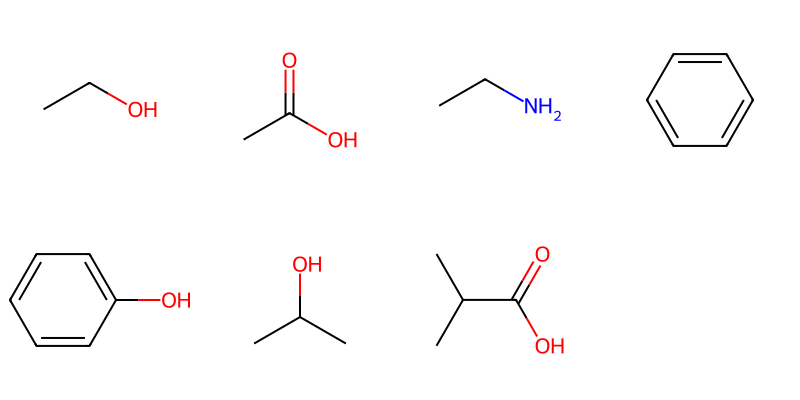

In [10]:
# Define example SMILES
smiles_list = [
    "CCO",          # ethanol
    "CC(=O)O",      # acetic acid
    "CCN",          # ethylamine
    "c1ccccc1",     # benzene
    "c1ccccc1O",    # phenol
    "CC(C)O",       # isopropanol
    "CC(C)C(=O)O",  # isobutyric acid
]

# Convert to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Display molecules
Draw.MolsToGridImage(mols, molsPerRow=4)

In [14]:
# Calculate basic molecular discriptiors
data = []

for smi, mol in zip(smiles_list, mols):
    if mol:
        data.append({
            "SMILES": smi,
            "MolWeight": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "HBA": rdMolDescriptors.CalcNumHBA(mol),
            "HBD": rdMolDescriptors.CalcNumHBD(mol)
        })

df = pd.DataFrame(data)
df
            
    

,SMILES,MolWeight,LogP,HBA,HBD
0,CCO,46.069,-0.0014,1,1
1,CC(=O)O,60.052,0.0909,1,1
2,CCN,45.085,-0.0350,1,1
3,c1ccccc1,78.114,1.6866,0,0
4,c1ccccc1O,94.113,1.3922,1,1
5,CC(C)O,60.096,0.3871,1,1
6,CC(C)C(=O)O,88.106,0.7270,1,1


In [15]:
# Perform clustering on descriptor space
X = df[["MolWeight", "LogP", "HBA", "HBD"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
df

,SMILES,MolWeight,LogP,HBA,HBD,Cluster
0,CCO,46.069,-0.0014,1,1,0
1,CC(=O)O,60.052,0.0909,1,1,2
2,CCN,45.085,-0.0350,1,1,0
3,c1ccccc1,78.114,1.6866,0,0,1
4,c1ccccc1O,94.113,1.3922,1,1,1
5,CC(C)O,60.096,0.3871,1,1,2
6,CC(C)C(=O)O,88.106,0.7270,1,1,1


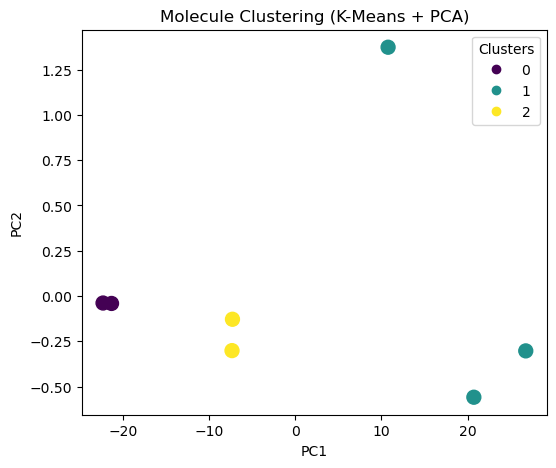

In [16]:
# Reduce to 2D and visualize
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(coords[:,0], coords[:,1], c=df["Cluster"], s=100)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Molecule Clustering (K-Means + PCA)")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()
